# MINIPROJETO 1

## <font color='red'>Otavio Siaulys Cardoso</font>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/otaviocardoso/Downloads


### Item 1 

In [38]:
#Leitura da base já em formato de DataFrame e extensão .csv
dados = pd.read_excel('BSK.xls')

In [39]:
dados.head()

,Name,Team,GP,Min,Pts,FG,FGA,FG%,2Pt,2PtA,...,FTM,FTA,FT%,Off,Def,TOT,Asts,Stls,Blks,TOs
0,Stephen Curry,Warriors,97,34.2,29.1,9.8,19.9,49.2,4.8,8.8,...,4.5,5.0,90.9,0.8,4.6,5.5,6.4,2.0,0.2,3.5
1,James Harden,Rockets,87,38.1,28.8,8.6,19.7,43.7,5.8,11.7,...,8.7,10.1,85.9,0.8,5.3,6.1,7.5,1.7,0.6,4.6
2,Kevin Durant,Thunder,90,36.7,28.2,9.7,19.9,48.8,7.3,13.3,...,6.4,7.2,89.6,0.7,7.3,8.0,4.7,1.0,1.1,3.5
3,DeMarcus Cousins,Kings,65,34.6,26.9,9.2,20.5,45.1,8.2,17.3,...,7.3,10.2,71.8,2.4,9.0,11.5,3.3,1.6,1.4,3.8
4,LeBron James,Cavaliers,97,36.4,25.5,9.9,18.9,52.2,8.6,15.0,...,4.5,6.3,71.7,1.6,6.3,7.9,6.9,1.6,0.8,3.3


### Item 3 

In [226]:
dados.A1 = dados["FG"].astype('float')
dados.A2=pd.Series(sorted(dados["FG"]))
dados.A2.describe()

count    324.000000
mean       4.032407
std        1.865915
min        1.200000
25%        2.600000
50%        3.500000
75%        5.200000
max        9.900000
dtype: float64

In [227]:
faixa = np.arange(1.2,9.9,0.25)
variávelCat = pd.cut(dados.A2, faixa) 
variávelCat.value_counts()

(2.95, 3.2]    27
(2.7, 2.95]    25
(2.45, 2.7]    23
(2.2, 2.45]    22
(4.95, 5.2]    19
(1.95, 2.2]    18
(3.45, 3.7]    17
(3.2, 3.45]    15
(4.2, 4.45]    14
(3.95, 4.2]    12
(1.45, 1.7]    12
(1.7, 1.95]    11
(3.7, 3.95]    11
(4.45, 4.7]    10
(4.7, 4.95]    10
(5.2, 5.45]     9
(5.95, 6.2]     8
(6.45, 6.7]     7
(7.95, 8.2]     7
(6.2, 6.45]     6
(6.95, 7.2]     5
(7.45, 7.7]     5
(6.7, 6.95]     5
(1.2, 1.45]     4
(5.45, 5.7]     4
(5.7, 5.95]     4
(7.2, 7.45]     4
(7.7, 7.95]     2
(8.95, 9.2]     2
(8.2, 8.45]     1
(8.45, 8.7]     1
(9.45, 9.7]     1
(9.2, 9.45]     0
(8.7, 8.95]     0
dtype: int64

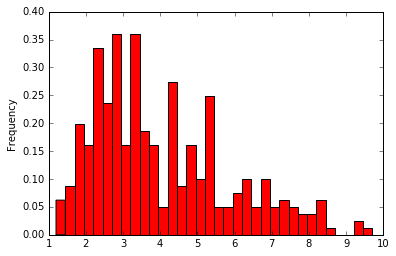

In [228]:
plot = dados.A2.plot.hist(bins = faixa, normed =1, color = 'r')

### Item 4 


Duas possíveis distribuições teóricas para modelar a quantidade de arremessos de 2 ou 3 pontos convertidos são: distribuição gamma e distribuição log normal. Ao analisarmos o formato da curva do histograma, podemos dizer que ela se assemelha muita à da distribuição normal, porém ela tem um formato assimétrico. Logo, se parece com a gama e a logaritima normal.

### Item 5


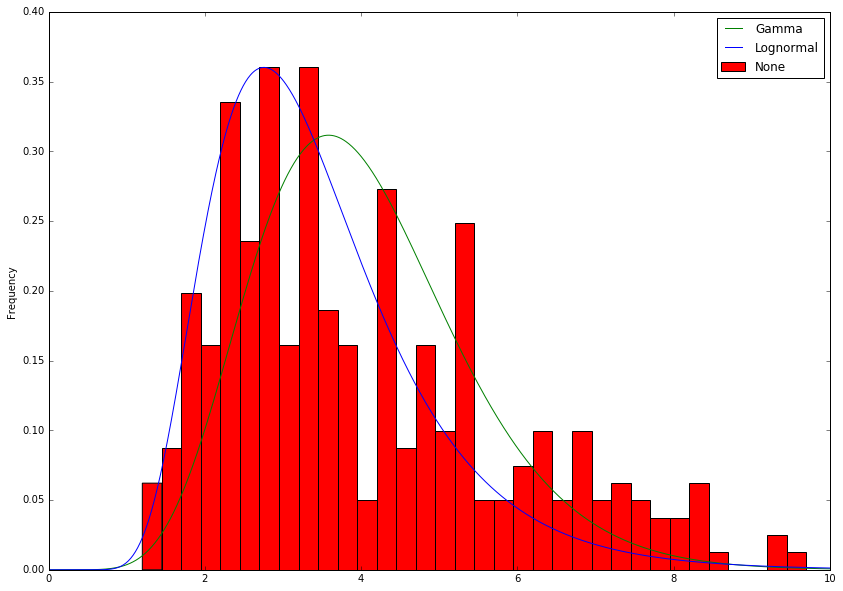

In [261]:
# plotando os graficos utilizando os parâmetros estimados 
k_gamma = 9

# Estimamos theta da distribuição gamma
theta_gamma = dados.A2.mean()/k_gamma


x = np.linspace(0, 10, 1000)

fig = plt.figure(figsize=(14,10))


# histograma e densidade teórica
plot = dados.A2.plot.hist(bins = faixa, normed =1, color = 'r')
lognormal = stats.lognorm.pdf(x, loc = 0.2 , s =0.4, scale=3)
gamma = stats.gamma.pdf(x, a=k_gamma, loc=0, scale= theta_gamma)


plt.plot(x, gamma, '-', color='g', label="Gamma") 
plt.plot(x, lognormal, '-', color='b', label="Lognormal") 

plt.legend()

### Item 6 e 7


In [259]:
parg = stats.gamma.fit(dados.A2)
print(parg)
parl = stats.lognorm.fit(dados.A2)
print(parl)

(2.3512613876998332, 1.0834029541914045, 1.2542210370880946)
(0.51072554230800582, 0.34181284887010166, 3.2518419543432335)


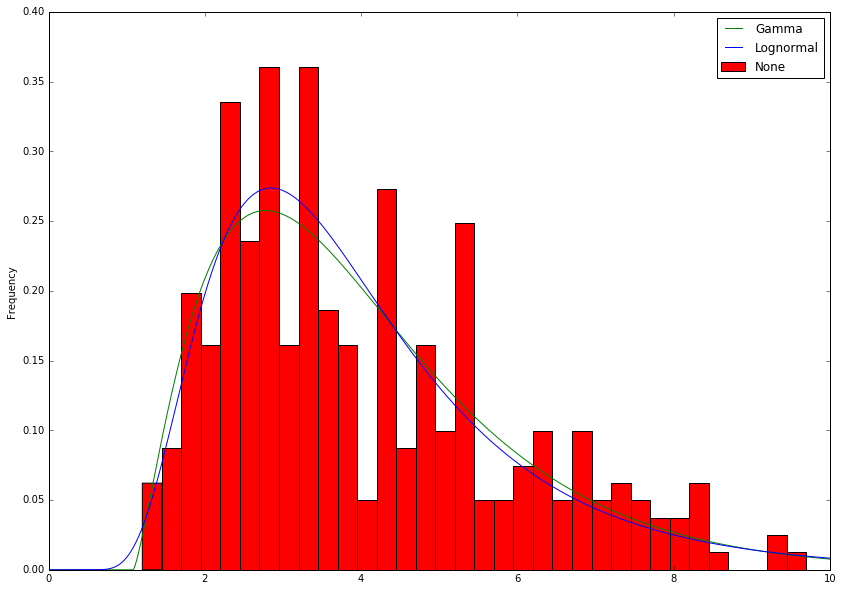

In [260]:
# plotando os graficos utilizando os parâmetros sugeridos pelo fit()
x = np.linspace(0, 10, 1000)

fig = plt.figure(figsize=(14,10))

# histograma e densidade teórica
plot = dados.A2.plot.hist(bins = faixa, normed =1, color = 'r')
lognormal = stats.lognorm.pdf(x, loc = parl[1], s =parl[0], scale=parl[2])
gamma = stats.gamma.pdf(x, a=parg[0], loc=parg[1], scale=parg[2] )


plt.plot(x, gamma, '-', color='g', label="Gamma") 
plt.plot(x, lognormal, '-', color='b', label="Lognormal") 

plt.legend()

### Item 8


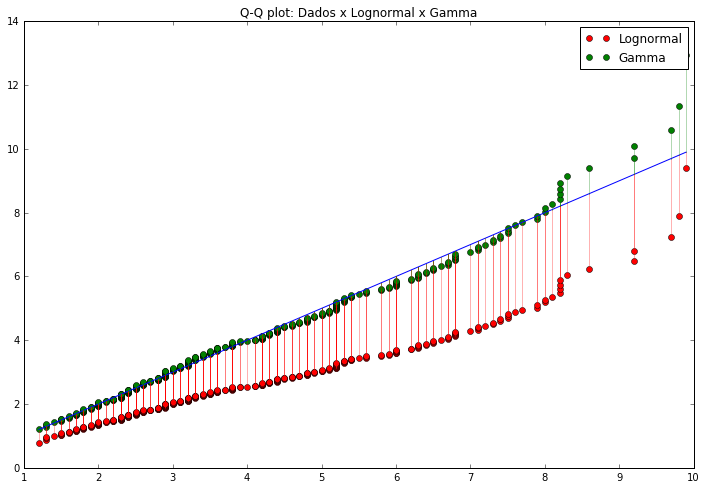

In [265]:
# QQplot dos graficos com parâmetros utilizados pelo fit()

# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fra = [] # frequencia relativa acumulada
for i in range(len(dados.A2)):
    acc = (i + 0.5) / len(dados.A2)
    if acc < 0:
        acc = 0
    fra.append(acc) 


fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_lognorm = stats.lognorm.ppf(fra,s =parl[0], loc=parl[1], scale =[2] )
q_gamma = stats.gamma.ppf(fra,a=parg[0],loc=parg[1],scale=parg[2])


fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Lognormal x Gamma")

lognorm_plot, = plt.plot(dados.A2, q_lognorm, 'o', color="red", label="Lognormal")
gamma_plot, = plt.plot(dados.A2, q_gamma, 'o', color="green", label = "Gamma")

plt.legend(handles=[lognorm_plot, gamma_plot])
plt.plot((min(dados.A2), max(dados.A2)), (min(dados.A2), max(dados.A2)), '-')


for i in range(len(dados.A2)):
    plt.plot((dados.A2[i], dados.A2[i]), (q_lognorm[i], dados.A2[i]), '-', color='red', alpha=0.3  )
    plt.plot((dados.A2[i], dados.A2[i]), (q_gamma[i], dados.A2[i]), '-', color='green', alpha=0.3  )

### Item 9 

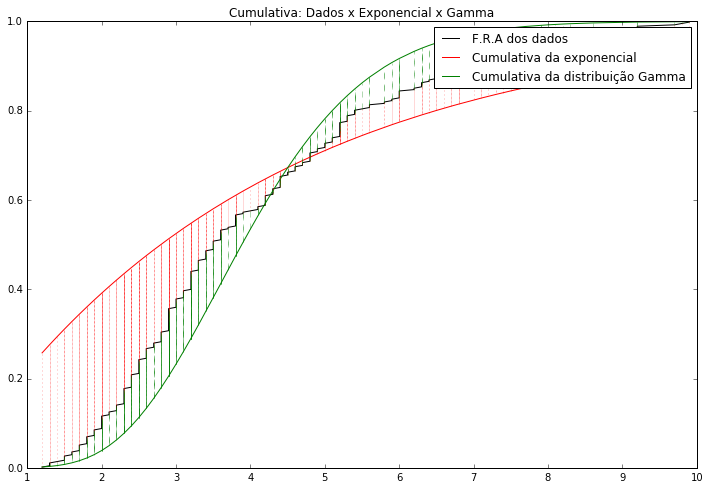

In [266]:
# fra e FDA
cdf_exponencial = stats.expon.cdf(dados.A2, scale=mi_exp) #FDA
cdf_gamma = stats.gamma.cdf(dados.A2, scale=theta_gamma, loc=0, a=k_gamma)


fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Exponencial x Gamma")

dados_fra_plot, = plt.plot(dados.A2, fra, '-', color='black', label="F.R.A dos dados")
cdf_exp_plot,   = plt.plot(dados.A2, cdf_exponencial, '-', color='red', label = "Cumulativa da exponencial")
cdf_gamma_plot, = plt.plot(dados.A2, cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma")

plt.legend(handles=[dados_fra_plot, cdf_exp_plot, cdf_gamma_plot])


for i in range(len(dados.A2)):
    plt.plot((dados.A2[i], dados.A2[i]), (fra[i], cdf_exponencial[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    plt.plot((dados.A2[i], dados.A2[i]), (fra[i], cdf_gamma[i]), '--', color="green", alpha=0.3)
    

### Item 10

In [267]:
erro_quadratico_lognorm = sum((dados.A2 - q_lognorm)**2)
erro_quadratico_gamma = sum((dados.A2 - q_gamma)**2)

print("Erro quadrático da log normal :{:4.3f}\n".format(erro_quadratico_lognorm))
print("Erro quadrático da gamma :{:4.3f}\n".format(erro_quadratico_gamma))

Erro quadrático da log normal :807.259

Erro quadrático da gamma :20.855



In [268]:
eqm_lognorm = erro_quadratico_lognorm/len(dados.A2)
eqm_gamma = erro_quadratico_gamma/len(dados.A2)

print("Erro quadratico médio da log normal :", eqm_lognorm)
print("Erro quadratico médio da gamma :", eqm_gamma)

Erro quadratico médio da log normal : 2.49153909358
Erro quadratico médio da gamma : 0.0643668045651


In [269]:
soma_diferenças_lognorm = sum(abs(dados.A2 - q_lognorm))
soma_diferenças_gamma = sum(abs(dados.A2 - q_gamma))

print("Soma de diferenças da log normal :", soma_diferenças_lognorm)
print("Soma de diferenças da gamma :", soma_diferenças_gamma)

Soma de diferenças da log normal : 458.013393937
Soma de diferenças da gamma : 40.6261650939


## item 11

|           |  Quadrático | Quadrático médio | Soma de diferenças|
|-----------|-------------|------------------|-------------------|
| Gamma      |    20,855   |     0,064366     |       40,626165   |
| Log Normal|   807,259   |    2,49152       |       458,01339   |

Concluindo, pode-se dizer que para a media de arremessos convertidos por jogo na NBA (liga de basquete americana), a melhor distribuição teórica para analisar os dados é a distribuição gamma, já que é a que apresenta menos dispersão com relação à realidade. No entanto, há trechos em que a distribuição log normal representa melhor os dados, como por exemplo quando x está entre 2,25 e 4.